# DBSCAN

- 클러스터 갯수를 미리 지정할 필요가 없다.
- 다소 느리지만 비교적 큰 셋에서도 적용 가능하다.
- 데이터들이 모여있는 밀집 지역에서 클러스터를 구성하면서 나아간다.
- 핵심 변수론 min_samples / eps 가 있다
    - min_samples : 클러스터에 들어갈 최소 데이터 갯수
    - eps : 클러스터를 구성할 데이터 간의 최소 거리
- eps안에 데이터 포인트 갯수를 min_samples와 비교 하여 클러스터를 구성 한다
    - 거리 안에 포인트 수가 min보다 적다면 그 포인트는 어떤 클래스에도 속하지 않는 잡음 레이블이 된다
    - 거리 안에 포인트 수가 min보다 많다면 그 포인트는 핵심샘플로 레이블 되고 새로운 클러스터 레이블에 할당 된다
    - 핵심샘플이 할당 된 후에 해당 포인트 기준 주변 이웃을 eps안에서 확인 한다.
    - 만약 어떤 클러스에도 할당 되지 않았다면 바로 전에 만든 클러스터 레이블에 할당 된다.
- eps 는 기본 0.5, min은 기본 5로 주어진다

1. 임포트 하기
    - from sklearn.cluster import DBSCAN

2. 모델 적용하기
    - dbscan = DBSCAN()
    - cluster = dbscan.fit_predict(X)
        - X값을 스켈링 해주는게 좋다
        
3. 모델 확인하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [7]:
import mglearn

In [3]:
X, y = make_blobs(random_state = 0, n_samples = 12)

dbscan = DBSCAN()

In [4]:
clusters = dbscan.fit_predict(X)

In [5]:
print ('cluster label " \n{}'.format(clusters))

cluster label " 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


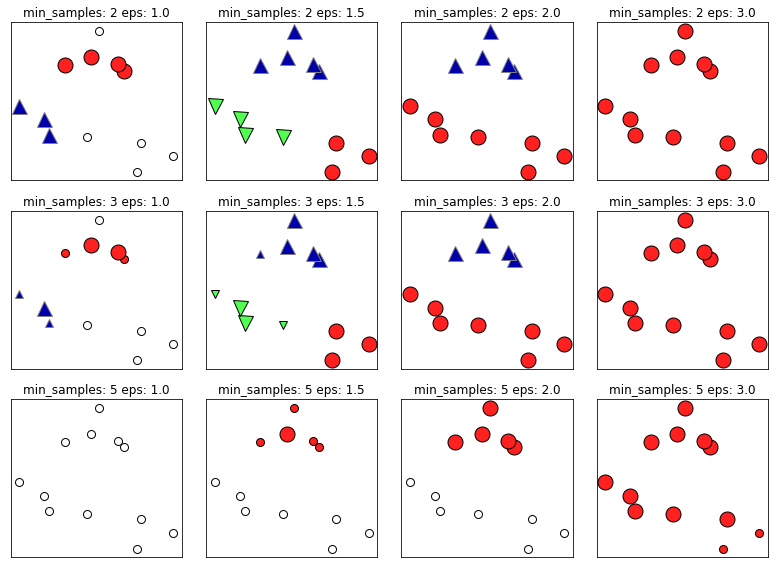

In [8]:
mglearn.plots.plot_dbscan()

In [9]:
from sklearn.datasets import make_moons

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(X)

In [25]:
dbscan = DBSCAN(eps = 0.2)

In [26]:
clusters = dbscan.fit_predict(X_scaled)

In [27]:
clusters.shape

(200,)

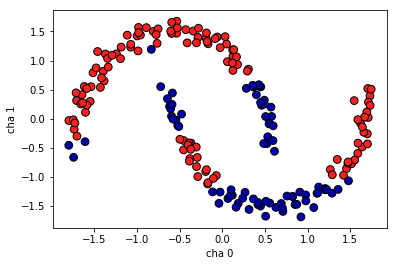

In [28]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters , cmap = mglearn.cm2, s = 60, edgecolors = 'black')
plt.xlabel('cha 0')
plt.ylabel('cha 1')